In [70]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
df=pd.read_csv("HousingData.csv")

In [72]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [73]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
206,0.22969,0.0,10.59,NaN,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,29.4
240,0.11329,30.0,4.93,NaN,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [75]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [76]:
df.shape

(506, 14)

In [77]:
df.fillna(df.mean(), inplace=True)

In [78]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [79]:
df.shape

(506, 14)

<Axes: >

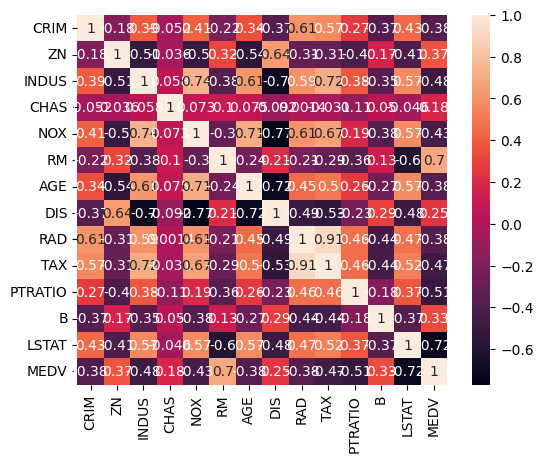

In [80]:
sns.heatmap(df.corr(),annot=True,square=True)

In [81]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [83]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
   
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1792      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=0.03)

Epoch 1/150
11/11 [==============================] - 0s 13ms/step - loss: 548.0463 - mae: 21.7072 - val_loss: 610.7470 - val_mae: 22.8373
Epoch 2/150
11/11 [==============================] - 0s 4ms/step - loss: 518.3094 - mae: 21.0372 - val_loss: 567.0992 - val_mae: 21.8466
Epoch 3/150
11/11 [==============================] - 0s 4ms/step - loss: 456.1607 - mae: 19.5293 - val_loss: 471.1557 - val_mae: 19.4934
Epoch 4/150
11/11 [==============================] - 0s 4ms/step - loss: 334.3267 - mae: 16.2249 - val_loss: 309.5156 - val_mae: 14.6354
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 160.8696 - mae: 10.6814 - val_loss: 140.9679 - val_mae: 9.1539
Epoch 6/150
11/11 [==============================] - 0s 5ms/step - loss: 69.2565 - mae: 6.5946 - val_loss: 105.5515 - val_mae: 6.8827
Epoch 7/150
11/11 [==============================] - 0s 4ms/step - loss: 47.7004 - mae: 5.1752 - val_loss: 119.8911 - val_mae: 6.9187
Epoch 8/150
11/11 [============================

In [88]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"Mean Squared Error",loss)
print(f"Mean Absolute Error", mae)

Mean Squared Error 15.470110893249512
Mean Absolute Error 2.6767678260803223


In [89]:
predictions = model.predict(x_test)

5/5 [==============================] - 0s 1ms/step


In [90]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: ",rmse)
# Compute R² Score
r2 = r2_score(y_test, predictions)
print(f"R2 Score : ",r2)

RMSE:  3.933206165047173
R2 Score :  0.8415491010848206


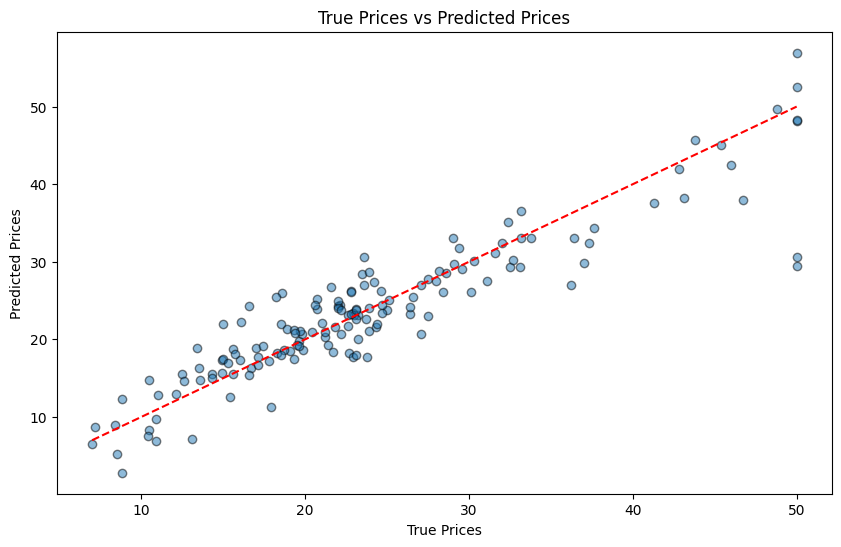

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions,alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

In [92]:
# Predictions 

predicted_value = model.predict(x_test[0].reshape(1, -1))
print(f"Prediction for X_test[{0}]: {predicted_value[0]}")


1/1 [==============================] - 0s 18ms/step
Prediction for X_test[0]: [26.046358]
